# Exploring Solar System Populations and the Main Belt in DP0.3
<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
Last verified to run: 2025-04-08 <br>
LSST Science Pipelines version: Weekly 2025_09 <br>
Container size: medium <br>
Targeted learning level: beginner <br>

**Description:** An overview of the contents of the DP0.3 moving object catalogs.

**Skills:** Use the TAP service and ADQL to access the DP0.3 tables.

**LSST Data Products:** TAP dp03_catalogs.

**Packages:** `lsst.rsp.get_tap_service`

**Credit:**  This notebook largely contains material drawn from DP0.3 tutorial notebooks 01_Introduction_to_DP03 and 02_Main_Belt_Asteroids originally authored by Bob Abel, Douglas Tucker, Melissa Graham, and Jeff Carlin.

**Get Support:**
Everyone is encouraged to ask questions or raise issues in the <a href="https://community.lsst.org/c/support/6">Support Category</a> of the Rubin Community Forum. Rubin staff will respond to all questions posted there.

## 1. Introduction

This notebook demonstrates how to access the simulated Data Preview 0.3 (DP0.3) data set in the Rubin Science Platform.

For the DP0.3 simulation, only moving objects were simulated, and only catalogs were created (there are no images).
The DP0.3 simulation is *entirely independent of and separate from* the DP0.2 simulation.

DP0.3 is a hybrid catalog that contains both real and simulated Solar System objects (asteroids, near-earth objects, Trojans, trans-Neptunian objects, and comets... but no major planets nor the Moon).
See the <a href="https://dp0-3.lsst.io">DP0.3 documentation</a> for more information about how the hybrid catalog was created.

In Rubin Operations, these tables would be constantly changing, updated every day with the results of
the previous night's observations.
However, for DP0.3, both a static 1-year catalog and a static 10-year catalog have been simulated.

> **Notice:** The remainder of this notebook, unless otherwise noted, will consider the tables for the 10-year catalog.


### 1.1. Package Imports

Import general python packages and the Rubin TAP service utilities.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import pandas as pd
from lsst.rsp import get_tap_service

### 1.2 Define Functions and Parameters

Define a function to convert a given perihelion distance (`q`) and eccentricity (`e`) to an orbital semi-major axis (`a`). Their relationship is defined by q = a(1-e).

In [2]:
def calc_semimajor_axis(q, e):
    """
    Given a perihelion distance and orbital eccentricity,
      calculate the semi-major axis of the orbit.

    Parameters
    ----------
    q: float
        Distance at perihelion, in au.
    e: float
        Orbital eccentricity.

    Returns
    -------
    a: float
        Semi-major axis of the orbit, in au.
        q = a(1-e), so a = q/(1-e)
    """

    return q / (1.0 - e)

## 2. Create the Rubin SSO TAP Service client

The DP0.3 data sets are available via the Table Access Protocol (TAP) service,
and can be accessed with ADQL (Astronomical Data Query Language) statements.

TAP provides standardized access to catalog data for discovery, search, and retrieval.
Full <a href="http://www.ivoa.net/documents/TAP">documentation for TAP</a> is provided by the International Virtual Observatory Alliance (IVOA).
ADQL is similar to SQL (Structured Query Langage).
The <a href="http://www.ivoa.net/documents/latest/ADQL.html">documentation for ADQL</a> includes more information about syntax and keywords.

Get an instance of the SSO TAP service, and assert that it exists.

> **Notice:** The DP0.3 TAP service is called `ssotap` (whereas `tap` is used for DP0.2).

In [3]:
service = get_tap_service("ssotap")
assert service is not None

## 3. The `MPCORB` table

During Rubin Operations, Solar System Processing will occur in the daytime, after a night of observing.
It will link together the difference-image detections of moving objects and report discoveries
to the <a href="https://minorplanetcenter.net">Minor Planet Center</a> (MPC),
as well as compute derived properties (magnitudes, phase-curve fits, coordinates in various systems).

The MPC will calculate the orbital parameters and these results will be passed back to Rubin, and stored
and made available to users as the `MPCORB` table.
The DP0.3 `MPCORB` table is a simulation of what this data product will be like after 10 years of LSST.

> **Notice:** The MPC contains all reported moving objects in the Solar System, and is not limited to those detected by LSST. Thus, the `MPCORB` table will have more rows than the `SSObject` table.

> **Notice:** For DP0.3, there was no fitting done by the MPC and the MPCORB table is the orbital elements used in the simulation (the `MPCORB` table is a truth table).

For more information about Rubin's plans for Solar System Processing, see Section 3.2.2 of the 
<a href="https://docushare.lsstcorp.org/docushare/dsweb/Get/LSE-163/LSE-163_DataProductsDefinitionDocumentDPDD.pdf">Data Products Definitions Document</a>.
Note that there remain differences between Table 4 of the DPDD, which contains the anticipated schema 
for the moving object tables, and the DP0.3 table schemas.

### 3.1. Size

Use the TAP service to count of the number of rows in the `MPCORB` table.

In [4]:
results = service.search("SELECT COUNT(*) FROM dp03_catalogs_10yr.MPCORB")
results.to_table()

COUNT1
int64
14462388


There are roughly 14.5 million rows in the `MPCORB` table.

### 3.2. Columns

Use the TAP service to query for the column information from `MPCORB`.

Print the results as a `pandas` table.

In [5]:
results = service.search("SELECT column_name, datatype, description, "
                         "       unit from TAP_SCHEMA.columns "
                         "WHERE table_name = 'dp03_catalogs_10yr.MPCORB'")
results.to_table().to_pandas()

,column_name,datatype,description,unit
0,arc,float,"MPCORB: Arc (days), for single-opposition objects",d
1,arcEnd,char,MPCORB: Year of last observation (for multi-op...,
2,arcStart,char,MPCORB: Year of first observation (for multi-o...,
3,computer,char,MPCORB: Computer name,
4,e,double,MPCORB: Orbital eccentricity,
5,epoch,double,"MPCORB: Epoch (in MJD, .0 TT)",d
6,flags,int,MPCORB: 4-hexdigit flags. See https://minorpla...,
7,fullDesignation,char,MPCORB: Readable designation,
8,incl,double,"MPCORB: Inclination to the ecliptic, J2000.0 (...",deg
9,lastIncludedObservation,float,MPCORB: Date of last observation included in o...,d


### 3.3. Retrieve a random subset

To retrieve a random subset of rows, make use of the fact that `ssObjectId` is a randomly assigned 64-bit long unsigned integer. 
Since ADQL interprets a 64-bit long unsigned integer as a 63-bit _signed_ integer, 
these range from a very large negative integer value to a very large positive integer value.
This will be fixed in the future so that all identifiers are positive numbers.

> **Notice:** By using `ssObjectId`, the following query returns a random subset of `MPCORB` rows *that are associated with a row in the `SSObject` table*. In other words, this limits the query to only retrieve moving objects from the `MPCORB` table that have been detected by LSST.



Define a search range for `ssObjectId` that would return no more than 1% of all objects in `MPCORB` by estimating a new minimum `ssObjectId` that is 1% _below_ the maximum `ssObjectId` for the full range of `ssObjectId` values.

> **Notice:** Since the _range_ of `ssObjectId`'s (-9223370383071521539 --> +9223370875126069107) is much larger than the number of _rows_ in the `MPCORB` table (14600302), don't expect to get _exactly_ 1% of the rows from `MPCORB` via this method. The result will have approximately 1%, as long as the `ssObjectId` values are distributed reasonably uniformly over their large range.


Execute the search, and retrieve all (\*) columns from the `MPCORB` table.

Define query.

In [6]:
query = """SELECT * FROM dp03_catalogs_10yr.MPCORB 
              WHERE ssObjectId BETWEEN 9038903462544093184 
              AND 9223370875126069107"""

Submit asynchronous query.

In [7]:
job = service.submit_job(query)
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)
results = job.fetch_result()
assert job.phase == 'COMPLETED'

Job phase is COMPLETED


Store the results in `df` as a `pandas` dataframe.

In [8]:
df = results.to_table().to_pandas()

In [9]:
print(len(df))

144472


144,472 rows were returned, which -- _as expected_ -- is almost (but not exactly) 1% of the 14,462,388 rows in the `MPCORB` table.  

> **Notice:** There are several columns that currently contain `NaN` (not a number) values.
For the simulated DP0.3 data these columns might be replaced in the near future, 
and for real data releases there will not be all-`NaN` columns.  If desired, users can drop all-`NaN` columns with, e.g., `df.dropna(axis=1, how='all', inplace=True)`.
However the better practice is to understand the columns and retrieve only what you are going to use.

### 3.4. Plot histograms of selected columns

Wikipedia provides a decent <a href="https://en.wikipedia.org/wiki/Orbital_elements">beginner-level guide to orbital elements</a>.

For a quick reference, distributions are shown below for five key orbital elements
and the absolute $H$ magnitude (see Section 4.3 for a description of $H$).

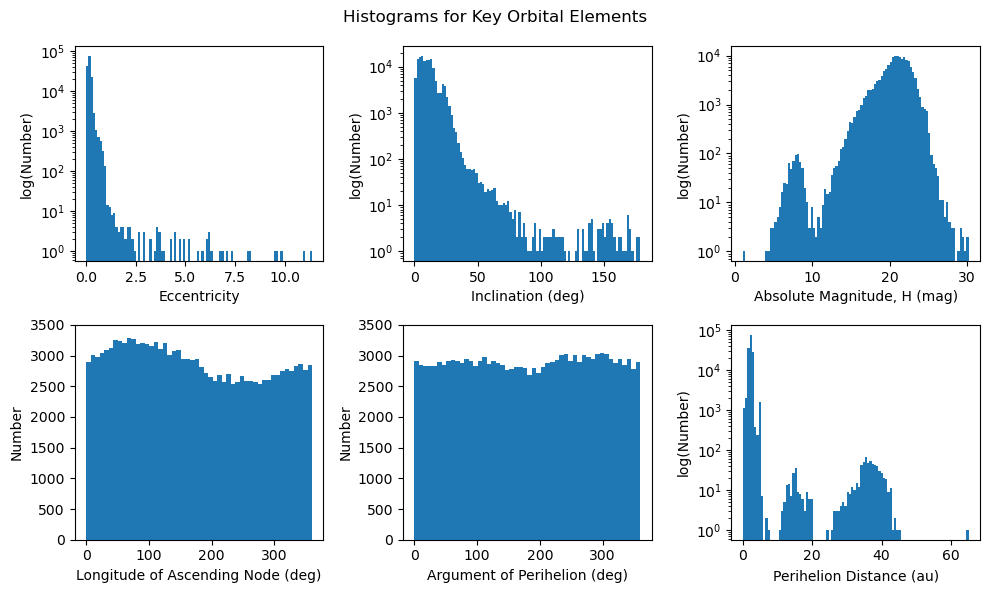

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6), sharey=False)
ax[0, 0].hist(df['e'], bins=100, log=True)
ax[0, 0].set_xlabel('Eccentricity')
ax[0, 0].set_ylabel('log(Number)')
ax[0, 1].hist(df['incl'], bins=100, log=True)
ax[0, 1].set_xlabel('Inclination (deg)')
ax[0, 1].set_ylabel('log(Number)')
ax[0, 2].hist(df['mpcH'], bins=100, log=True)
ax[0, 2].set_xlabel('Absolute Magnitude, H (mag)')
ax[0, 2].set_ylabel('log(Number)')
ax[1, 0].hist(df['node'], bins=50)
ax[1, 0].set_xlabel('Longitude of Ascending Node (deg)')
ax[1, 0].set_ylabel('Number')
ax[1, 0].set_ylim(0,3500)
ax[1, 1].hist(df['peri'], bins=50)
ax[1, 1].set_xlabel('Argument of Perihelion (deg)')
ax[1, 1].set_ylabel('Number')
ax[1, 1].set_ylim(0,3500)
ax[1, 2].hist(df['q'], bins=100, log=True)
ax[1, 2].set_xlabel('Perihelion Distance (au)')
ax[1, 2].set_ylabel('log(Number)')
fig.suptitle('Histograms for Key Orbital Elements')
fig.tight_layout()
plt.show()

> **Figure 1**: Six histograms showing the (log) number of solar system objects in the `MPCORB` table as a function of their eccentricity, inclination, absolute H magnitude, longitude of the ascending node, argument of perihelion, and perihelion distance (from upper left to lower ight).

## 4. The `SSObject` table

During Rubin Operations, Prompt Processing will occur during the night, detecting sources in 
difference images (`DiaSources`) and associating them into static-sky transients
and variables (`DiaObjects`, not included in DP0.3).

The Solar System Processing which occurs in the daytime, after a night of observing,
links together the `DiaSources` for moving objects into `SSObjects`.
Whereas the `MPCORB` table contains the orbital elements for these moving objects,
the `SSObjects` contains the Rubin-measured properties such as phase curve fits and absolute magnitudes.

> **Notice:** no artifacts or spurious difference-image sources have been injected into the DP0.3 catalogs.

> **Notice:** although there are columns for them, no _u-_ or _Y_-band data were simulated for DP0.3.  Unless noted, ignore _u-_ or _Y_-band data for the remainder of this notebook.

### 4.1. Size

Use the ADQL count function to return the number of rows in the `SSObject` table.

In [11]:
results = service.search("SELECT COUNT(*) from dp03_catalogs_10yr.SSObject")
results.to_table().to_pandas()

,COUNT1
0,4443479


The DP0.3 data set contains 4.4 million solar system objects detected by Rubin.

This is less than the 14.5 million objects in the `MPCORB` catalog.
It is left as an exercise for the learner to determine the characteristics of those 
objects from the `MPCORB` table are missing from the `SSObject` table.

### 4.2. Retrieve a random subset

Use essentially the same query as was used for the `MPCORB` table, above.

Define query.

In [12]:
query = """SELECT * FROM dp03_catalogs_10yr.ssObject 
                WHERE ssObjectId BETWEEN 9038903462544093184 
                AND 9223370875126069107"""


Submit asynchronous query.

In [13]:
job = service.submit_job(query)
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)
results = job.fetch_result()
assert job.phase == 'COMPLETED'

Job phase is COMPLETED


Store the results in df as a pandas dataframe.

In [14]:
df = results.to_table().to_pandas()

In [15]:
print(len(df))

44611


There are 44611 rows.

### 4.3. Plot a color-color diagram

Before calculating and plotting the colors, drop all of the rows for which the phase-curve fits were not successful for g, r, i, and/or z bands.

In [16]:
df.dropna(subset=['g_H', 'r_H', 'i_H', 'z_H'], inplace=True)
df.reset_index(inplace=True)
print('Number of rows after dropping rows: %d' % len(df))

Number of rows after dropping rows: 30853


For Solar System objects, absolute magnitudes are defined to be for an object 1 au from the Sun and 1 au 
from the observer, and at a phase angle (the angle Sun-object-Earth) of 0 degrees.

Absolute magnitudes are derived by correcting for distance, fitting a function to the relationship between 
absolute magnitude and phase, and evaluating the function at a phase of 0 deg.

Calculate colors in the Rubin filters for the `SSObjects` that have absolute magnitudes.

In [17]:
df['gr'] = df['g_H'] - df['r_H']
df['ri'] = df['r_H'] - df['i_H']
df['iz'] = df['i_H'] - df['z_H']

Plot color-color diagrams as 2-dimensional histograms (heatmaps).

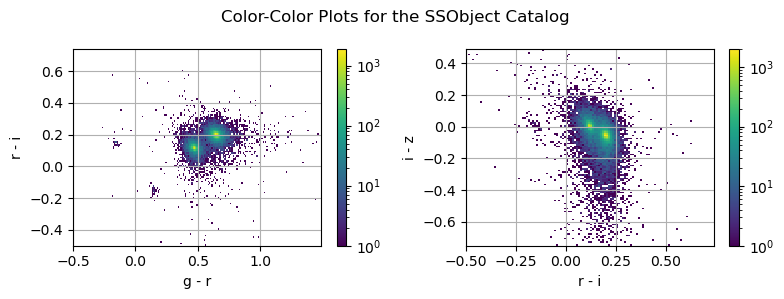

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

h = ax[0].hist2d(df['gr'], df['ri'],
                 bins=(np.arange(-0.5, 1.5, 0.01),
                       np.arange(-0.5, 0.75, 0.01)),
                 norm='log')
ax[0].set_xlabel('g - r')
ax[0].set_ylabel('r - i')
ax[0].grid()
plt.colorbar(h[3])

h = ax[1].hist2d(df['ri'], df['iz'],
                 bins=(np.arange(-0.5, 0.75, 0.01),
                       np.arange(-0.75, 0.5, 0.01)),
                 norm='log')
ax[1].set_xlabel('r - i')
ax[1].set_ylabel('i - z')
ax[1].grid()
plt.colorbar(h[3])

fig.suptitle('Color-Color Plots for the SSObject Catalog')
fig.tight_layout()
plt.show()

> **Figure 2:** Two panels showing color-color plots for the retrieved subset of the `SSObject` catalog. At left, the $r-i$ vs. $g-r$ color and at right, the $i-z$ versus $r-i$ color. In both panels, the color distribution is bimodal.

As shown in the figure above, there are two colors used in the simulation - but this is not the case for real Solar System objects.
These plots will look very different in the future, when they are made with real Rubin data.

## 5. The `SSSource` table

As described above, Solar System Processing links together the `DiaSources` (detections in the
individual difference images) from moving objects into `SSObjects`. 

The `SSSource` table contains the 2-d (sky) coordinates and 3-d distances and velocities 
for every `SSObject` at the time of every LSST observation of that `SSObject`.
The `SSSource` and `DiaSource` tables are 1:1, as they each contain data *per observation*,
whereas `SSObject` contains data *per object*.

### 5.1. Size

It can take up to a minute to retrieve the size of the `SSSource` catalog.

Define query.

In [19]:
query = "SELECT COUNT(*) from dp03_catalogs_10yr.SSSource"


Submit asynchonous query.

In [20]:
job = service.submit_job(query)
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)
results = job.fetch_result()
assert job.phase == 'COMPLETED'

Job phase is COMPLETED


Display results as a pandas data frame. 

In [21]:
results.to_table().to_pandas()

,COUNT1
0,653005444


**_This table contains over 653 million sources!_**

### 5.2. Retrieve data for one `SSObject`

Examine the`SSSource` table contents for just one `SSObject`, the one with an `ssObjectId` = `6793512588511170680`.

Retrieve the heliocentric (sun-centered) and topocentric (observatory-centered) X and Y coordinates.

Define the query and run the asynchronous query.

In [22]:
query = """SELECT heliocentricX, heliocentricY, 
              topocentricX, topocentricY, ssObjectId 
              FROM dp03_catalogs_10yr.SSSource 
              WHERE ssObjectId = 6793512588511170680"""

job = service.submit_job(query)
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)
results = job.fetch_result()
assert job.phase == 'COMPLETED'

df_xy = results.to_table().to_pandas()
print('Retrieved ', len(df_xy), ' rows.')

Job phase is COMPLETED
Retrieved  319  rows.


### 5.3. Plot the locations of one `SSObject`

Plot the locations of the selected `SSObject` at the time of every 
LSST observation using the X and Y heliocentric (Sun-centered; orange star) 
coordinates.
This can be considered a projection of the orbit into the plane of the Solar System.

Notice how the points are not regularly spaced.
This is because there is one point per LSST observation of the object,
and in some years it receives more or fewer observations.

Notice how the points appear in an ellipse around the Sun with heliocentric coordinates.
This is because the selected object is in the main asteroid belt and close enough to the Sun 
to complete at least on orbit during the 10-year LSST survey.
Had the selected object been in the outer Solar System, or were this tutorial using
the 1-year data set, the plot below would show an arc instead of an ellipse.

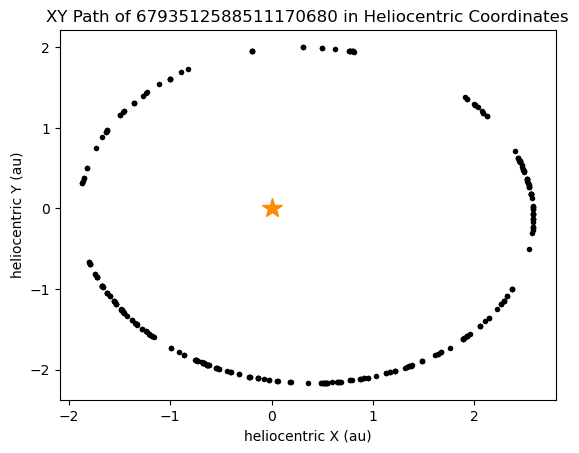

In [23]:
plt.plot(df_xy['heliocentricX'], df_xy['heliocentricY'],
         'o', ms=4, mew=0, color='black')
plt.plot(0, 0, '*', ms=15, color='darkorange')
plt.xlabel('heliocentric X (au)')
plt.ylabel('heliocentric Y (au)')
plt.title('XY Path of 6793512588511170680 in Heliocentric Coordinates')
plt.show()

> **Figure 3:** The two-dimensional projection of the location of the selected solar system object into the XY plane in heliocentric (Sun-centered) coordinates. The Sun is represented by an orange star and the solar system object's positions are represented by small black circles.

## 6. The Main Belt in DP0.3

Query the DP0.3 catalogs, joining the MPCORB and SSObject tables on their ssObjectId. One _could_ retrieve the entire catalog (containing millions of rows), but that query may take a long time. To minimize query time but still extract a large sample, use a range of `ssObjectId` values.

Define the query.

In [24]:
query = """SELECT mpc.ssObjectId, mpc.e, mpc.incl, mpc.q, mpc.peri, 
        sso.ssObjectId, sso.g_H, sso.r_H, sso.i_H, sso.z_H 
        FROM dp03_catalogs_10yr.MPCORB as mpc 
        JOIN dp03_catalogs_10yr.SSObject as sso 
        ON mpc.ssObjectId = sso.ssObjectId 
        WHERE mpc.ssObjectId < 9223370875126069107 
        AND mpc.ssObjectId > 7331137166374808576 
        AND sso.numObs > 50"""

Submit the asynchronous query.

In [25]:
job = service.submit_job(query)
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)
results = job.fetch_result()
assert job.phase == 'COMPLETED'

Job phase is COMPLETED


Store the results as a pandas dataframe called `df_mpc_sso` and display number of results.

In [26]:
df_mpc_sso = results.to_table().to_pandas()

In [27]:
print('The query returned ', len(df_mpc_sso), ' results.')

The query returned  339864  results.


### 6.1 Overall orbital properties

First, calculate the semi-major axis of each object's orbit, using the function we defined above.

In [28]:
a = calc_semimajor_axis(df_mpc_sso.q, df_mpc_sso.e)

### 6.2 Semi-major axes of Main Belt asteroids

For the rest of this notebook, focus on the so-called ["Main Belt" asteroids](https://en.wikipedia.org/wiki/Asteroid_belt), which roughly speaking inhabit the space between the orbits of Mars and Jupiter. The exact Main Belt definition is not uniform in the literature; for DP0.3 we adopt the definition used by the [JPL small-body database](https://ssd.jpl.nasa.gov/tools/sbdb_query.htmlhttps://ssd.jpl.nasa.gov/tools/sbdb_query.html), where the definitions of the orbital families are visible as the popup notes associated with the "orbital class" info. This definition places the Main Belt between 1.6 au < a < 4.6 au, with the constraint q > 1.6 au to ensure that objects don't cross Mars' orbit. However, in this notebook, we alter the definition a bit and consider objects with 1.6 au < a < 4.2 au, q > 1.6, to allow comparison to figures from other papers.

Start by visualizing where Main Belt asteroids are located in the Solar System via their `semi-major axis (a)`.

In [29]:
main_belt = (a > 1.6) & (a < 4.2)

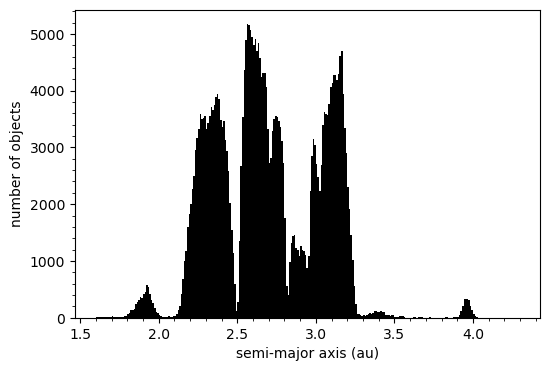

In [30]:
fig = plt.figure(figsize=(6, 4))

plt.hist(a[main_belt], bins=np.arange(1.6, 4.3, 0.01), color='Black')
plt.xlabel('semi-major axis (au)')
plt.ylabel('number of objects')
plt.minorticks_on()
plt.show()

> **Figure 4:** A histogram of the number of Main Belt asteroids as a function of semi-major axis.

Clearly it's not just a uniform "belt" between Mars and Jupiter -- it has some "gaps" where there are very few (or no) objects. These are known as [Kirkwood gaps](https://en.wikipedia.org/wiki/Kirkwood_gap), which arise due to resonances between the asteroid's orbital period and that of Jupiter. For example, at a=2.5 au, an asteroid orbits 3 times for each single orbit of Jupiter, and is thus in a "3:1 resonance".